# 1. Definir o algoritmo;

O algoritmo a ser utlizado será o Linear_model.LinearRegression da biblioteca Sklearn utlizando como ferramenta a linguagem python 3 no jupyter notebook do google colab.

# 2. Apresentar e ilustrar como o algoritmo funciona;

  O algoritmo ajusta (método fit) uma linha de regressão com coeficientes de um conjunto de dados com o objetivo de minimmizar a soma dos quadrados dos resíduos entre uma ou mais variáveis preditoras (dependentes),  e  uma  variável (a ser prevista) indenpendente.
  A análise de regressão é um processo estatístico que busca estimar  os relacionamentos entre uma ou mais variáveis dependentes (preditora)s ou de saída, e uma variável (target) independente a ser prevista. O objetivo da regressão no aprendizado de máquina é fazer a previsão de valores continuos como montante de vendas, quantidade, temperatura, etc.

---



#3. Listar as aplicações, vantagens e desvantagens do algoritmo;

Os algoritmos de regressão linear são utilizados em estatística em uma infinidade de aplicações, mas principalmente em estatísitica descritiva para analisar o relacionamento entre duas variáveis continuas. São considerados algoritmos simples e são muito utilizados quando a quantidade de variáveis dependentes é muito grande. Porém a simplcidade pode ser uma desvantagem , porque a regressão linear simples não tem grande eficiência no ajuste do método dos miínimos quadrados.

# 4. Implementação de Algoritmo:
Será apresentado abaixo a resolução de um problema para prever os preços das casas da cidade de King County (EUA), com base na metragem quadrada (sqft_living), metragem quadrada do lote(sqft_lot),  numero de quartos (bedrooms), numero de banheiros (bathrooms), data de venda(date) e preço de venda , um dataset conhecido e muito utlizado como exemplo de regressão presente no site do Kaggle.

In [107]:
# Executado por Davi Silva Porto 13/01/2020
# 1. Importando a biblioteca pandas e numpy para executar a leitura dos dados e transforma-los em um Data-Frame = df 
import pandas as pd
import numpy as np
df = pd.read_csv('house_prices.csv') 

In [108]:
#métodos da biblioteca pandas para melhor visualização dos Dados no google Colab
pd.set_option('display.max_columns', None)
%load_ext google.colab.data_table

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [109]:
# Apresantando os dados de entrada com 21613 linhas e 21 columns
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [25]:
#Pré-Processamento dos dados
# Desejamos como variável Target a coluna Price, observamos que as duas ultimas colunas contém dados nulos iremos retiras com o pandas estes dados. 
X = df.iloc[:, 5:6].values
#vamos utlizar como variáveis preditoras (dependentes) as colunas de 0 até 5 apenas 
# fixando o  preço 'price' como variável alvo (independente).
Y = df.iloc[:,2].values

In [26]:
#particionando o dataframe em treinamento e teste, importando train_test_split do sklearn
# 30% para os dados de teste e 70% para os dados de treinamento, escolhido aleatoriamente
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, Y_treinamento, Y_teste = train_test_split(X,Y, test_size = 0.3, random_state = 0)

In [27]:
#Executando a regresssão linear com o sklearn
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, Y_treinamento )

In [28]:
#imprimindo o score, vemos que a reta de regressão se ajusta a  quase 50% dos dados
print(score)
# vemos que os dados não se ajustaram de maneira satisfatória ao modelo 

0.49453356717789776


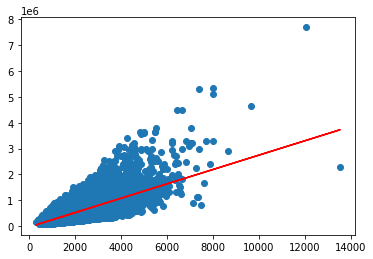

In [29]:
#imprimindo a reta de regressão para os dados de treinamento (70% dos dados) com o matplotlib
# comprovando o problema de ajuste dos dados
import matplotlib.pyplot as plt
plt.scatter(X_treinamento, y_treinamento)
plt.plot(X_treinamento, regressor.predict(X_treinamento), color = 'red')

In [30]:
#executando a regressão (previsões) com os dados de teste
previsoes = regressor.predict(X_teste)

In [33]:
#executando o valor absoluto da diferença entre os dados de teste e as previsões
#vemos pelo gráfico acima que o modelo está errando bastante, vamos calcular os valores absolutos para os dados de teste,
#retirando os valores negativos
resultado = abs(Y_teste - previsoes)
resultado.mean()

172604.1288999542

In [34]:
#vemos que o modelo esta errando o preço das casa em média em USD 172604.1288999542
#temos recursos do sklearn para fazer a comparação dos erros 
#calculando os parâmetros estatísticos erro absoluto médio e erro quadrático médio
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(Y_teste, previsoes)
mse = mean_squared_error(Y_teste, previsoes)

In [35]:
print(mae)
#erro absoluto cono calculado anteriormente de USD 172604.1288999542
print(mse)
#erro absoluto elevado ao quadrado de USD 70170013932.1159

172604.1288999542
70170013932.1159


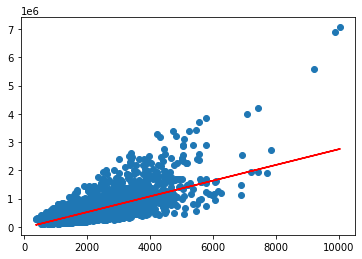

In [36]:
#imprimindo a reta ajustada  de regressão (previsões) para os dados de teste 
plt.scatter(X_teste, Y_teste)
plt.plot(X_teste, regressor.predict(X_teste), color = 'red')

In [42]:
#calculando o ajuste (score) da reta de regressão aos dados de teste, vemos que a regressão se ajusta a apenas 49% dos dados
# os dados contém muitos resíduos e as métricas devem ser apuradas , e devemos utilizar mais atributos na base de dados, executando uma regressão múltipla 
regressor.score(X_teste, Y_teste)

0.4888992901945303

In [111]:
# como vimos que as colunas 0  a 5 do nosso Dataset não foram bons previsores para os preços das casas. 
 #vamos inserir as outras vcolunas dos dados como atributos previsores,as colunas 3 a 19.
X = df.iloc[:, 3:19].values
y = df.iloc[:, 2].values

In [112]:
# particionando novamente os dados em teste e treinamento com sklearn
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)

In [113]:
#executando a regressão múltipla , o sklearn já reconhece automaticamente a regessão e cria o modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)
score = regressor.score(X_treinamento, y_treinamento)

In [114]:
#executando novamente as previsões do modelo para os dados de teste agora com os novos atributos
previsoes2 = regressor.predict(X_teste)

In [115]:
# executando novamente as métricas de erro absoluto médio 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_teste, previsoes2)

In [116]:
print(mae)
#observamos que o modelo diminui o erro na previsão dos preços das casas que era de USD 172604.1288999542
# e passou a ser de USD 123888.44377485718, ainda esta errando bastante

123888.44377485718


In [117]:
#executando o regressor novamente
regressor.score(X_teste, y_teste)

0.6885414149062777

#observamos que a reta de gressão se ajustou melhor aos dados com 68.85% de ajuste o que indica uma maior correlação destas novas colunas previsoras aos preços das casa da cidade em questão.

#Referências:

https://www.kaggle.com/harlfoxem/housesalesprediction

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

https://medium.com/machina-sapiens/algoritmos-de-aprendizagem-de-m%C3%A1quina-qual-deles-escolher-67040ad68737

https://stackoverflow.com/questions/51196227/python-plotting-and-linear-regression-x-and-y-must-be-the-same-size/51196339
